### Reads the data file: L2_flux_comp_atl_all_ver2
### and : (1) Produces violin plots (2) Calculates percent diff


### This produces fig 3 in the paper: 
- Aiyyer and Schreck (2023): Surface wind speeds and Enthalpy Fluxes During Tropical Cyclone Formation From Easterly Waves: A CYGNSS view

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import statsmodels
#import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from scipy import stats

import math

In [2]:
import seaborn as sns
sns.set_theme(style="darkgrid")


In [4]:
#open the data set containing the flux data

# sandbox version of the SDR V2.0 flux data
fileName = '/home/sagan/work/data/data100/data/nasa/cygnss/paper/old_v2/L2_flux_atl_all_ver2_017.nc'


# Data obtained from podaac  SDR V2.0 flux data
fileName = '/home/sagan/work/data/data100/data/papers/cygnss/L2_flux_atl_all_ver2.nc'

ds = xr.open_dataset(fileName)
print(ds)

<xarray.Dataset>
Dimensions:   (LagDays: 9, points: 328000)
Coordinates:
  * LagDays   (LagDays) float32 -4.0 -3.0 -2.0 -1.0 0.0 1.0 2.0 3.0 4.0
  * points    (points) float64 7.0 16.0 22.0 36.0 51.0 ... nan nan nan nan nan
Data variables:
    LHF       (LagDays, points) float32 ...
    distance  (LagDays, points) float32 ...
    iPoints   (LagDays) float64 ...
    SHF       (LagDays, points) float32 ...
    SHF_YSLF  (LagDays, points) float32 ...
    LHF_YSLF  (LagDays, points) float32 ...


In [5]:
# convert to a pandas data frame
heatFlux = ds.to_dataframe().droplevel('points')
heatFlux.reset_index(inplace=True)
heatFlux.dropna(inplace=True)


# drop days past 3
heatFlux=heatFlux.drop(heatFlux.query(" `LagDays`>3 ").index)
heatFlux=heatFlux.drop(heatFlux.query(" `LagDays`<-3 ").index)

# dropdistance past 700km
heatFlux=heatFlux.drop(heatFlux.query(" `distance`>700 ").index)

# what contributes to the declining SHF mean and median values?
#heatFlux=heatFlux.drop(heatFlux.query(" `distance`<500 ").index)
#print(heatFlux)


## Violin Plot

/tmp/ipykernel_11753/1609548699.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  xx=[f'{x1:.1f}' for x1 in heatFlux.groupby('LagDays').median().index]


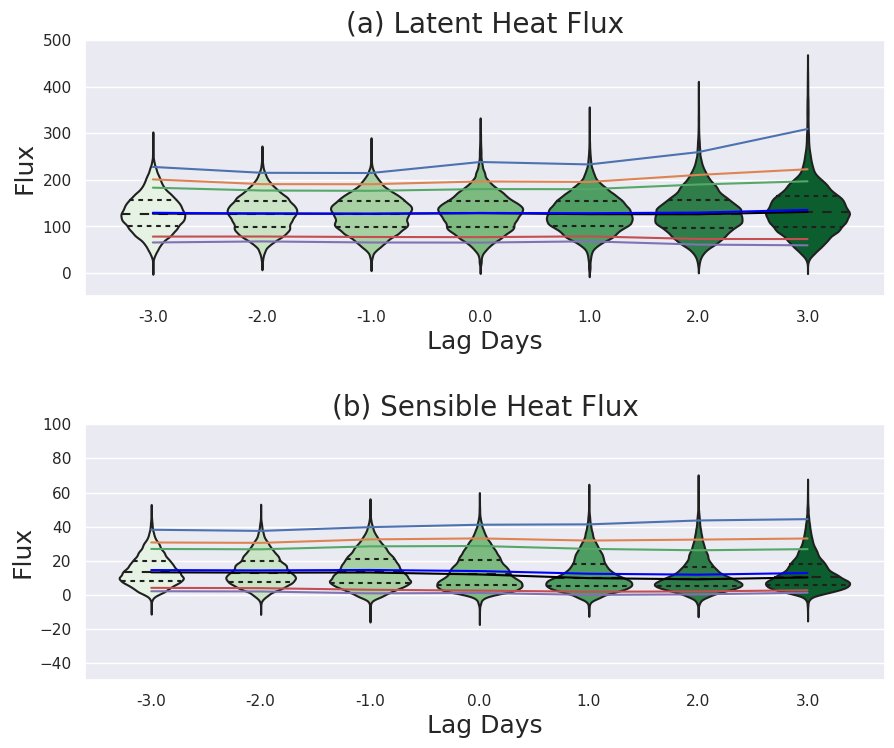

In [6]:
fig, axs = plt.subplots(2,figsize=(10,8))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

#fig.suptitle('')
heatFlux['LagDays2'] = [f'{x:.1f}' for x in heatFlux['LagDays']]

axs[0].set(ylim=(-50, 500))
axs[1].set(ylim=(-50, 100))



axs1 = sns.violinplot(ax=axs[1], x=heatFlux['LagDays2'], y=heatFlux['SHF'], palette="Greens" , inner = "quartile", scale="count")
axs2 = sns.violinplot(ax=axs[0], x=heatFlux['LagDays2'], y=heatFlux['LHF'], palette="Greens" , inner = "quartile", scale="count")

axs1.set_ylabel('Flux', fontsize = 18)
axs1.set_title('(b) Sensible Heat Flux', fontsize = 20)


axs2.set_ylabel('Flux', fontsize = 18)
axs2.set_title('(a) Latent Heat Flux', fontsize = 20)

axs2.set_xlabel("Lag Days", fontsize = 18)
axs1.set_xlabel("Lag Days", fontsize = 18)


xx=[f'{x1:.1f}' for x1 in heatFlux.groupby('LagDays').median().index]

ax2 = sns.lineplot(ax=axs[1],x=xx, y=heatFlux.groupby('LagDays').SHF.median().values, color='black' , legend=False)
ax2 = sns.lineplot(ax=axs[1],x=xx, y=heatFlux.groupby('LagDays').SHF.mean().values, color='blue' , legend=False)
ax2 = sns.lineplot(ax=axs[1],x=xx, y=heatFlux.groupby('LagDays').SHF.quantile(0.99).values, legend=False)
ax2 = sns.lineplot(ax=axs[1],x=xx, y=heatFlux.groupby('LagDays').SHF.quantile(0.95).values, legend=False)
ax2 = sns.lineplot(ax=axs[1],x=xx, y=heatFlux.groupby('LagDays').SHF.quantile(0.90).values, legend=False)
ax2 = sns.lineplot(ax=axs[1],x=xx, y=heatFlux.groupby('LagDays').SHF.quantile(0.1).values, legend=False)
ax2 = sns.lineplot(ax=axs[1],x=xx, y=heatFlux.groupby('LagDays').SHF.quantile(0.05).values, legend=False)


ax2 = sns.lineplot(ax=axs[0],x=xx, y=heatFlux.groupby('LagDays').LHF.median().values, color='black' , legend=False)
ax2 = sns.lineplot(ax=axs[0],x=xx, y=heatFlux.groupby('LagDays').LHF.mean().values, color='blue' , legend=False)
ax2 = sns.lineplot(ax=axs[0],x=xx, y=heatFlux.groupby('LagDays').LHF.quantile(0.99).values, legend=False)
ax2 = sns.lineplot(ax=axs[0],x=xx, y=heatFlux.groupby('LagDays').LHF.quantile(0.95).values, legend=False)
ax2 = sns.lineplot(ax=axs[0],x=xx, y=heatFlux.groupby('LagDays').LHF.quantile(0.90).values, legend=False)
ax2 = sns.lineplot(ax=axs[0],x=xx, y=heatFlux.groupby('LagDays').LHF.quantile(0.1).values, legend=False)
ax2 = sns.lineplot(ax=axs[0],x=xx, y=heatFlux.groupby('LagDays').LHF.quantile(0.05).values, legend=False)


In [7]:
# get the percent change of the flux percentile value
# Latent Heat flux


perc = [0.05,.10,.50,.90,.95,.99]
for x in perc:
    A = heatFlux.groupby('LagDays').LHF.quantile(x).values
    A_change = (A[-1] - A[0] )*100/A[0]
    print ('LHF percentile = ', x, 'percent change = ', A_change, '   ', A[0], A[-1] )
    
    
A=heatFlux.groupby('LagDays').LHF.mean().values
A_change = (A[-1] - A[0] )*100/A[0]
print ( 'LHF mean percent change =', A_change)
 

LHF percentile =  0.05 percent change =  -9.301061275923333     65.50716705322266 59.41430530548096
LHF percentile =  0.1 percent change =  -6.741793379956852     78.17372436523438 72.90341339111329
LHF percentile =  0.5 percent change =  2.8770241844042492     127.4466781616211 131.11334991455078
LHF percentile =  0.9 percent change =  7.4843709231739615     183.26907653808595 196.9856140136719
LHF percentile =  0.95 percent change =  10.810344919939897     201.11407775878905 222.85520324707028
LHF percentile =  0.99 percent change =  35.774730397350034     227.85981567382822 309.376050415039
LHF mean percent change = 4.742918314172594


In [8]:
# get the percent change of the flux percentile value
# Sensible heat flux
perc = [0.05,.10,.50,.90,.95,.99]
for x in perc:
    A = heatFlux.groupby('LagDays').SHF.quantile(x).values
    A_change = (A[-1] - A[0] )*100/A[0]
    print ('SHF percentile = ', x, 'percent change = ', A_change, '   ',  A[0], A[-1] )

    
A=heatFlux.groupby('LagDays').SHF.mean().values
A_change = (A[-1] - A[0] )*100/A[0]
#print ( 'mean', A_change, A[0], A[-1] )
print ( 'SHF mean percent change =', A_change)


SHF percentile =  0.05 percent change =  -39.27084286315607     2.15520977973938 1.308840733766556
SHF percentile =  0.1 percent change =  -34.07771967862241     4.134344959259034 2.725454473495484
SHF percentile =  0.5 percent change =  -22.45763899814655     13.23242473602295 10.260734558105469
SHF percentile =  0.9 percent change =  -0.3651581622606626     26.924224090576175 26.825908088684084
SHF percentile =  0.95 percent change =  7.586451034104044     30.730990219116205 33.06238174438476
SHF percentile =  0.99 percent change =  16.23356380659897     38.1922689819336 44.3922353363037
SHF mean percent change = -11.856781372044775


In [9]:
print ('----mean SHF---------')
A=heatFlux.groupby('LagDays').SHF.mean().values
print(A)
A_change = (A[-1] - A[0] )*100/A[0]
print ( 'SHF mean percent change =', A_change)


print ('----Median SHF---------')
x=0.5
A = heatFlux.groupby('LagDays').SHF.quantile(x).values
print(A)
A_change = (A[-1] - A[0] )*100/A[0]
print ( 'SHF median percent change =', A_change)


----mean SHF---------
[14.564815 14.369521 14.612972 13.98053  12.422723 11.858958 12.837896]
SHF mean percent change = -11.856781372044775
----Median SHF---------
[13.23242474 13.05767536 13.14498806 11.98861217  9.82793999  9.13892365
 10.26073456]
SHF median percent change = -22.45763899814655


# Zoomed in near the mean

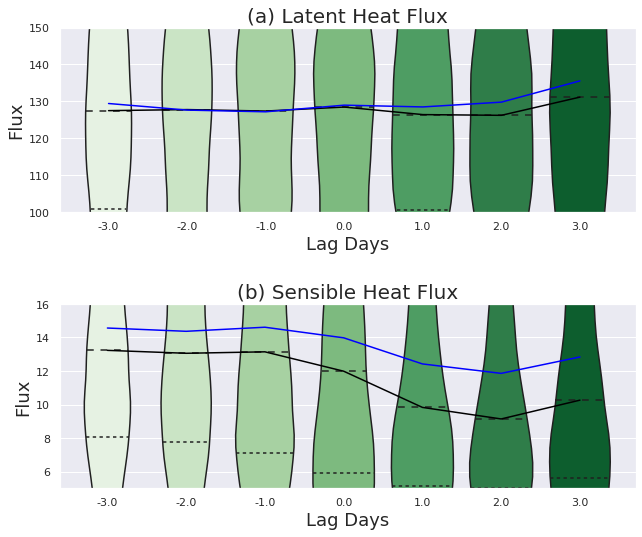

In [22]:
fig, axs = plt.subplots(2,figsize=(10,8))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

#fig.suptitle('')
heatFlux['LagDays2'] = [f'{x:.1f}' for x in heatFlux['LagDays']]

axs[0].set(ylim=(100, 150))
axs[1].set(ylim=(5, 16))



axs1 = sns.violinplot(ax=axs[1], x=heatFlux['LagDays2'], y=heatFlux['SHF'], palette="Greens" , inner = "quartile", scale="count")
axs2 = sns.violinplot(ax=axs[0], x=heatFlux['LagDays2'], y=heatFlux['LHF'], palette="Greens" , inner = "quartile", scale="count")

axs1.set_ylabel('Flux', fontsize = 18)
axs1.set_title('(b) Sensible Heat Flux', fontsize = 20)


axs2.set_ylabel('Flux', fontsize = 18)
axs2.set_title('(a) Latent Heat Flux', fontsize = 20)

axs2.set_xlabel("Lag Days", fontsize = 18)
axs1.set_xlabel("Lag Days", fontsize = 18)


xx=[f'{x1:.1f}' for x1 in heatFlux.groupby('LagDays').median().index]

ax2 = sns.lineplot(ax=axs[1],x=xx, y=heatFlux.groupby('LagDays').SHF.median().values, color='black' , legend=False)
ax2 = sns.lineplot(ax=axs[1],x=xx, y=heatFlux.groupby('LagDays').SHF.mean().values, color='blue' , legend=False)
ax2 = sns.lineplot(ax=axs[1],x=xx, y=heatFlux.groupby('LagDays').SHF.quantile(0.99).values, legend=False)
ax2 = sns.lineplot(ax=axs[1],x=xx, y=heatFlux.groupby('LagDays').SHF.quantile(0.95).values, legend=False)
ax2 = sns.lineplot(ax=axs[1],x=xx, y=heatFlux.groupby('LagDays').SHF.quantile(0.90).values, legend=False)
ax2 = sns.lineplot(ax=axs[1],x=xx, y=heatFlux.groupby('LagDays').SHF.quantile(0.1).values, legend=False)
ax2 = sns.lineplot(ax=axs[1],x=xx, y=heatFlux.groupby('LagDays').SHF.quantile(0.05).values, legend=False)


ax2 = sns.lineplot(ax=axs[0],x=xx, y=heatFlux.groupby('LagDays').LHF.median().values, color='black' , legend=False)
ax2 = sns.lineplot(ax=axs[0],x=xx, y=heatFlux.groupby('LagDays').LHF.mean().values, color='blue' , legend=False)
ax2 = sns.lineplot(ax=axs[0],x=xx, y=heatFlux.groupby('LagDays').LHF.quantile(0.99).values, legend=False)
ax2 = sns.lineplot(ax=axs[0],x=xx, y=heatFlux.groupby('LagDays').LHF.quantile(0.95).values, legend=False)
ax2 = sns.lineplot(ax=axs[0],x=xx, y=heatFlux.groupby('LagDays').LHF.quantile(0.90).values, legend=False)
ax2 = sns.lineplot(ax=axs[0],x=xx, y=heatFlux.groupby('LagDays').LHF.quantile(0.1).values, legend=False)
ax2 = sns.lineplot(ax=axs[0],x=xx, y=heatFlux.groupby('LagDays').LHF.quantile(0.05).values, legend=False)
